In [1]:
import os

# Define your dataset path
dataset_path = "/kaggle/input/aptos-dataset"

# List all files in the dataset
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        print(os.path.join(root, file))  # Print full path of each image

/kaggle/input/aptos-dataset/preprocessed_images/Mild/f481f76a6b75.png
/kaggle/input/aptos-dataset/preprocessed_images/Mild/abdb365cacbc.png
/kaggle/input/aptos-dataset/preprocessed_images/Mild/33ffddea8c6e.png
/kaggle/input/aptos-dataset/preprocessed_images/Mild/059bc89df7f4.png
/kaggle/input/aptos-dataset/preprocessed_images/Mild/278aa860dffd.png
/kaggle/input/aptos-dataset/preprocessed_images/Mild/d66b6f333dc7.png
/kaggle/input/aptos-dataset/preprocessed_images/Mild/a8c950a99107.png
/kaggle/input/aptos-dataset/preprocessed_images/Mild/cab3dfa7962d.png
/kaggle/input/aptos-dataset/preprocessed_images/Mild/63363410389a.png
/kaggle/input/aptos-dataset/preprocessed_images/Mild/4da2961e62fe.png
/kaggle/input/aptos-dataset/preprocessed_images/Mild/22098b1fe461.png
/kaggle/input/aptos-dataset/preprocessed_images/Mild/e9286ddf6ffe.png
/kaggle/input/aptos-dataset/preprocessed_images/Mild/4c129470cec4.png
/kaggle/input/aptos-dataset/preprocessed_images/Mild/b1197f2cc9b3.png
/kaggle/input/aptos-

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             validation_split=0.2)  # 20% validation split

# Define dataset path
dataset_path = "/kaggle/input/aptos-dataset/preprocessed_images"

# Load training data (80%)
train_data = datagen.flow_from_directory(dataset_path,
                                         target_size=(224, 224),
                                         batch_size=32,
                                         class_mode='categorical',
                                         subset='training')  # Use training split

# Load validation data (20%)
valid_data = datagen.flow_from_directory(dataset_path,
                                         target_size=(224, 224),
                                         batch_size=32,
                                         class_mode='categorical',
                                         subset='validation')  # Use validation split



Found 2512 images belonging to 5 classes.
Found 626 images belonging to 5 classes.


In [3]:
import tensorflow as tf

In [4]:
!pip install -q efficientnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.3 MB/s eta 0:00:00


In [5]:
import efficientnet.tfkeras as efn



In [6]:
import tensorflow as tf 
def lr_rate(epoch, lr):
    initial_lr = 1e-4
    decay_rate = 0.9  # Decay by 10% every epoch
    return initial_lr * (decay_rate ** epoch)

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_rate)


Computed Class Weights: {0: 0.4226262626262626, 1: 1.8513274336283185, 2: 0.7222094361334868, 3: 3.5862857142857143, 4: 2.3244444444444445}
16804768/16804768 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - acc: 0.4011 - loss: 3.4207 - val_acc: 0.5112 - val_loss: 2.2506 - learning_rate: 1.0000e-04
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 443ms/step - acc: 0.6506 - loss: 2.5624 - val_acc: 0.6422 - val_loss: 2.1427 - learning_rate: 9.0000e-05
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 435ms/step - acc: 0.6941 - loss: 2.3364 - val_acc: 0.7093 - val_loss: 2.0151 - learning_rate: 8.1000e-05
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 438ms/step - acc: 0.7069 - loss: 2.2761 - val_acc: 0.7013 - val_loss: 1.9404 - learning_rate: 7.2900e-05
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 438ms/step - acc: 0.7360 - loss: 2.1328 - val_acc: 0.7220 - val_loss: 1.8507 - learning_rate: 6.5610e-05
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 434ms/step - acc: 0.7510 - loss: 2.1175 - val_acc: 0.7604 - val_loss: 1.7716 - learning_rate: 5.9049e-05
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 434ms/step - acc: 0.7693 - loss: 1.9990 - val_acc: 0.7620 - val_loss: 1.7540 - learning_r

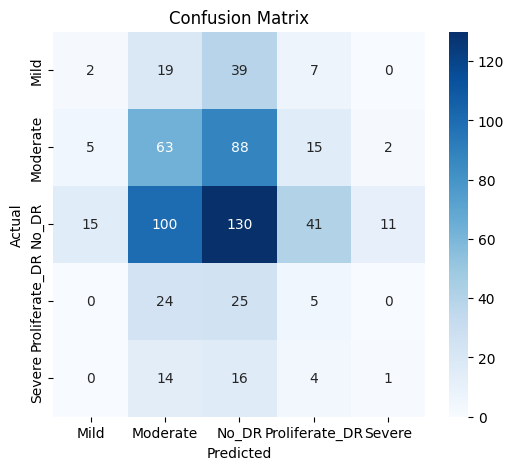

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
import efficientnet.tfkeras as efn

# Get class labels from the generator
class_indices = train_data.class_indices  # e.g., {'No-DR': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3, 'Proliferative_DR': 4}
class_names = list(class_indices.keys())  # ['No-DR', 'Mild', 'Moderate', 'Severe', 'Proliferative_DR']
class_labels = np.array(list(class_indices.values()))  # [0, 1, 2, 3, 4]

# Get the correct class order
class_labels = np.unique(train_data.classes)  # Ensures correct ordering

# Define class labels and their corresponding sample counts
class_labels = np.array([0, 1, 2, 3, 4])  # Assuming 5 classes
samples_per_class = np.array([1485, 339, 869, 175, 270])  # Your given dataset distribution

# Compute class weights
class_weights = compute_class_weight(class_weight="balanced", classes=class_labels, y=np.repeat(class_labels, samples_per_class))
class_weight_dict = dict(zip(class_labels, class_weights))

print("Computed Class Weights:", class_weight_dict)
# Define the model
base_model = efn.EfficientNetB0(
    input_shape=(224, 224, 3),
    weights='imagenet',
    include_top=False
)

model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Convert feature maps to 1D vector
    BatchNormalization(),  # Normalize activations for stable learning
    Dense(1024, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # Smaller dense layer to reduce overfitting
    Dropout(0.5),  # Lower dropout for regularization
    Dense(5, activation='softmax')  # 5 classes for DR detection
])

# Compile the model
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['acc'])
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',     # Monitor validation loss
    patience=5,             # Number of epochs with no improvement before stopping
    restore_best_weights=True,  # Restore best model (avoid overfitting)
    verbose=1
)

# Train the model
history = model.fit(
    train_data,  
    validation_data=valid_data,
    class_weight=class_weight_dict, 
    callbacks=[early_stopping,lr_callback],  
    epochs=20,  
    verbose=1  
)

# Print overall training and validation loss & accuracy
train_loss, train_acc = model.evaluate(train_data, verbose=0)
val_loss, val_acc = model.evaluate(valid_data, verbose=0)

print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

# Get true labels and predictions
y_true = valid_data.classes  # Get actual labels directly
y_pred = np.argmax(model.predict(valid_data), axis=1)  # Get predictions in one step

# Print Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred))

# Print Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [8]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnet-b0 (Functional)         │ (None, 7, 7, 1280)          │       4,049,564 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,025,509 (61.13 MB)

 Trainable params: 5,326,977 (20.32 MB)

 Non-trainable params: 44,576 (174.12 KB)

 Optimizer params: 10,653,956 (40.64 MB)